In [24]:
using DelimitedFiles
using Plots
using Statistics
using LaTeXStrings
using SpecialFunctions
using LsqFit

Hier werden die Daten ausgewertet welche mit dem Notebook **Ising_Modell_final.ipynb** erzeugt wurden. Die Plots entsprechen den Abbildungen in Kapitel 6 der Bachelorarbeit.

In [25]:
#Operatorgeschwindigkeit des zufälligen Quantenschaltkreis
v_O(q) = (q^2-1)/(q^2 + 1)

v_O (generic function with 1 method)

Für das Ising Modell mit transversalem und longitudinalem Feld wurde ein Produktoperator $S_{0}$ um eine Zeit t=50 entwickelt. Die Systemgröße wurde auf $L=60$ festgelegt. Während die Simulationen für eine Zeit t=50 durchgeführt wurden, werden alle Abbildungen bis eine Zeit t=30 erstellt, weil die Ergebnsisse für längere Zeiten aufgrund der beschränkten Bond Dimension ungenau erscheinen.

In [29]:
#Zum Laden der Daten

#Ordner mit den Daten (der Ordner enthält 6 Daten jeweils für die verschiedenen Felder hx von 0 bis 1 in 0.2er Schritten):
output_folder = "chaotisches_Ising_Modell_300_delta_0.1" #Die Bond Dimension beträgt 300 und der lokale Zeitschritt delta = 0.1
files = joinpath.(output_folder, readdir(output_folder))

L_f = length(files)

#Arrays definieren in die unsere Daten geladen werden:
res_r = Vector{Matrix{Float64}}(undef, L_f)
res_l = similar(res_r)

#Alle Daten im Ordner durchgehen und in res_l und res_r speichern
for (j,f) in enumerate(files[1:L_f])
    res = readdlm(f)
    L2 = size(res,2)
    @assert iseven(L2)
    L = div(L2,2)
    #Die ersten L Werte enstprechen der Operatordichte rho_L
    res_l[j] = reverse(res[:, 1:L],dims=1)
    #Die letzten L Werte enstprechen der Operatordichte rho_R
    res_r[j] = reverse(res[:, L+1:end], dims = 1) 
end

#=
res_r[1] bzw. res_l[1] entspricht der Operatordichte rho_R bzw. rho_L für den integrablen Fall
res_r[2] bis res_r[6] bzw. res_l[2] bzw. res_l[6] entsprechen den Operatordichten für hx=0.2,...,1.0
=#

In [27]:
#Selbst definierter Color scheme:
mycolor = palette([:white, :yellow,:orange,:orange,:red,:red], 10000)

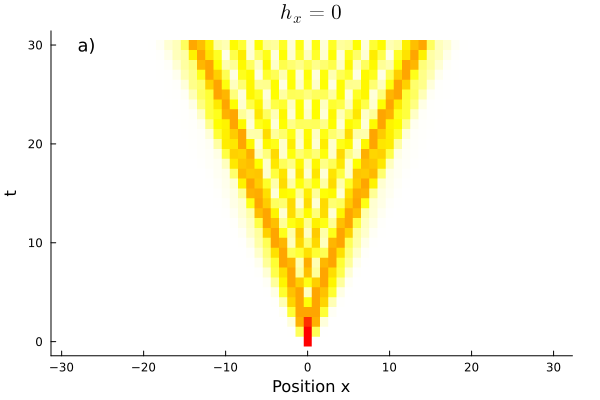

In [30]:
#Raumzeit-Diagramm der addierten Operatordichten im integrablen Fall: 
let
    xaxisvalues = -29:30
    yaxisvalues = 0:30

    #Beide Operatordichten werden addiert (wir plotten nur bis t=30)
    rho_comp = (res_l[1][1:31,:] .+ res_r[1][1:31,:])./2

    #Wir multiplizieren mit sqrt(t) zur besseren Darstellung der Operatorfront:
    for i in 1:31
    
        rho_comp[i,:] = rho_comp[i,:]*sqrt(i)
    
    end

    
    #Plot des Raumzeit-Diagramms:
    plot(heatmap(xaxisvalues, yaxisvalues, rho_comp,color=mycolor,colorbar=false,colorbar_title=L"$\sqrt{t}\left(\rho_{L}(x,t) + \rho_{R}(x,t)\right)$"),annotations=(-27, 30, "a)"),annotationfontsize=12)
    

#     v = v_O(2)
#     vl = 1

#     plot!(x -> 1/v*(x - 0) , 0:11, label="Operatorgeschwindigkeit", ls=:dash)
#     plot!(x -> 1/v_num*x.-1, 0.1:0.1:4.1, color="black",label=L"v_{O}",ls=:dash,lw=1.5,grid=false)
#     plot!(x -> 1/vl*(-x - 0), -18:0, color="yellow",label=false,ls=:dash)
    title!(L"h_{x}=0")
    xlabel!("Position x")
    ylabel!("t")
    plot!(x -> 1*(-x - 0), 0:0, color="yellow",label=false,ls=:dash,grid=false) #Die Zeile ist nur Deko und kann ignoriert werden
    

#     savefig("RZ_h_00.pdf")
end

In [31]:
#Fit der Operatorgeschwindigkeit (hx=0.6) zur Zeit t=30:

#Fit Modell gegeben durch Gaußverteilung (verschoben um 0.5 um Diskretisierungsfehler zu korrigieren)
rhoR_exakt(x,t,p) = p[3]/sqrt(4*pi *p[1]*t) .* exp.(-((x.-0.5) .- p[2].*t).^2 ./(4*p[1]*t))
rhoR_modell(x,p) = rhoR_exakt(x,31,p) #bei t=30 wird gefittet

x = range(-29, 30, step = 1)

#first guess der Daten: p[1] ist Diffusionskonstante, p[2] ist die Operatorgeschwindigkeit und p[3] ist die Amplitude 
p0 = [0.5,0.5,1]

#Fit der Parameter bei t=30 
fit = curve_fit(rhoR_modell, x, res_r[4][31,:], p0)
fit.param

3-element Vector{Float64}:
 0.17569803562217867
 0.26789681640360663
 0.9542255556619154

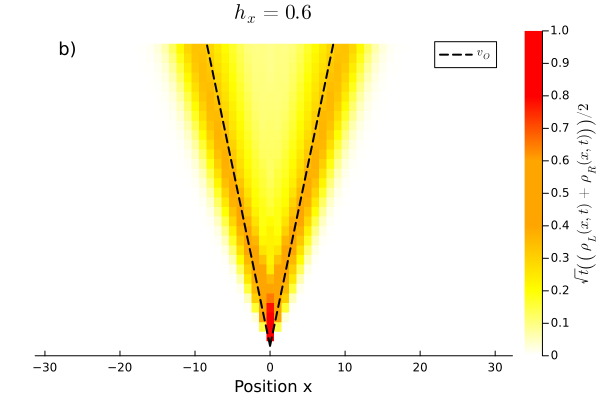

In [32]:
#Raumzeit-Diagramm der addierten Operatordichten im nicht-integrablen Fall (hx=0.6): 
let
    xaxisvalues = -29:30
    yaxisvalues = 0:30

    #Beide Operatordichten werden addiert (geplottet wird bis t=30)
    rho_comp = (res_l[4][1:31,:] .+ res_r[4][1:31,:])./2

    #Wir multiplizieren mit sqrt(t) zur besseren Darstellung der Operatorfront:
    for i in 1:31
    
        rho_comp[i,:] = rho_comp[i,:]*sqrt(i)
    
    end

    #in der vorigen Zelle bestimmte Operatorgeschwindigkeit
    v_num = fit.param[2]
    
    #Plot des Raumzeit-Diagramms:
    plot(heatmap(xaxisvalues, yaxisvalues, rho_comp,color=mycolor,cbar_lims=(0,1),colorbar_title=L"$\sqrt{t}\left(\left(\rho_{L}(x,t) + \rho_{R}(x,t)\right)\right)/2$"),annotations=(-27, 30, "b)"),annotationfontsize=12)
    
    #Plot der numerisch bestimmte Operatorgeschwindigkeit
    plot!(x -> 1/v_num*x.-1, 0.02:0.01:8.54, color="black",label=L"v_{O}",ls=:dash,lw=2,grid=false,legend_position=:topright)
    plot!(x -> 1/v_num*(-x).-1, -8.39:0.01:0.02, color="black",label=false,ls=:dash,lw=2,grid=false)

    title!(L"h_{x}=0.6")
    xlabel!("Position x")
#     ylabel!("t")
    plot!(x -> 1*(-x - 0), 0:0, color="yellow",label=false,ls=:dash,grid=false,showaxis=:x)
    

#     savefig("RZ_h_04.pdf")
end

In [34]:
#Fit der Operatorgeschwindigkeit und der Diffusionskonstante mit Hilfe der Gaußkurve

#Fit Modell gegeben durch Gaußverteilung
rhoR_exakt(x,t,p) = p[3]/sqrt(4*pi *p[1]*t) .* exp.(-((x.-0.5) .- p[2].*t).^2 ./(4*p[1]*t))
rhoR_modell(x,p) = rhoR_exakt(x,31,p) #bei t=30 wird gefittet

x = range(-29, 30, step = 1)

#first guess der Daten p[1] ist Diffusionskonstante, p[2] ist die Operatorgeschwindigkeit und p[3] ist die Amplitude 
p0 = [7,0.5,1]
#Array um die gefitteten Operatorgeschwindigkeiten und Diffusionskonstante zu speichern
velocities = []
D = []

#Fit für jeden Wert von hx > 0
for hx in 2:6
   
    #Fit bei t=30
    fit = curve_fit(rhoR_modell, x, res_r[hx][31,:], p0)
    
    #Werte für D und v_O in Array laden
    push!(D,fit.param[1])
    push!(velocities,fit.param[2])
end


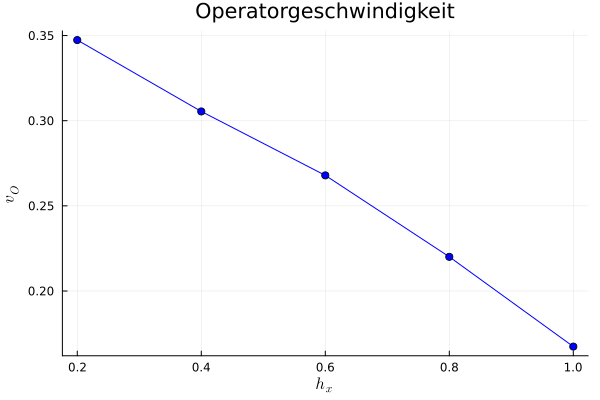

In [36]:
#Plot der gefitteten Operatorgeschwindigkeit bei verschiedenen longitudinalen Feldern

hx=0.2:0.2:1
plot(hx,velocities, color="blue",label=false)
scatter!(hx,velocities, color="blue",label=false)

xlabel!(L"$h_{x}$")
ylabel!(L"v_{O}")
title!("Operatorgeschwindigkeit")
# savefig("v_gg_hx.pdf")

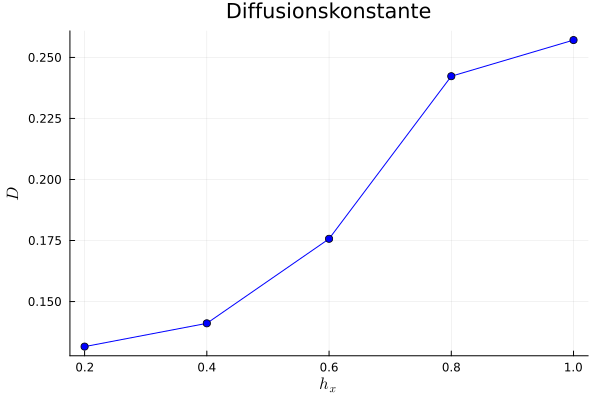

In [37]:
#gefittete Diffusionskonstante D für das Ising Modell im nicht integrablen Regime bei verschiedenen longitudinalen Feldern

hx=0.2:0.2:1
plot(hx,D, color="blue",label=false)
scatter!(hx,D, color="blue",label=false)

xlabel!(L"$h_{x}$")
ylabel!(L"D")
title!("Diffusionskonstante")

# savefig("D_gg_hx.pdf")

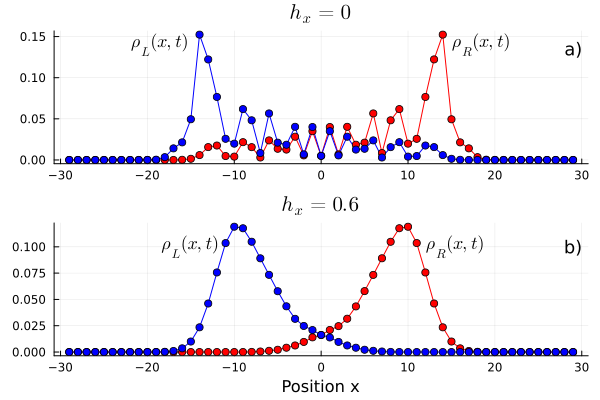

In [39]:
#Plot der Operatordichten rho_L und rho_R, einmal im integrablen Regime und einmal im nicht-integrablen Regime
let
    
    xrange = -29:29
    t = 31
   
    #Exaktes Ergebniss, gegeben durch Gaußkurve
#     rhoR_exakt(x,t) = fit.param[2]/sqrt(pi *(1-fit.param[1]^2)*t) .* exp.(-((x.-0.5) .- fit.param[1].*t).^2 ./((1-fit.param[1]^2)*t))
    
    
    #Plot der Operatordichten rho_L und rho_R im integrablen Fall (hx=0):
    
    #Letzter Wert wird für einen symmetrischen Plot rausgelassen
    p1 = plot(xrange,res_r[1][t,1:end-1], label=false,color="red",annotations=(18.5, 0.14, L"$\rho_{R}(x,t)$"),annotationfontsize=12)
    plot!(xrange,res_l[1][t,1:end-1], label=false,color="blue",annotations=(-18.5, 0.14, L"$\rho_{L}(x,t)$"),annotationfontsize=12)
    scatter!(xrange, res_r[1][t,1:end-1], label=false, color="red")
    scatter!(xrange, res_l[1][t,1:end-1], label=false, color="blue")
    title!(L"h_{x}=0")
    plot!(annotations=(29, 0.135, "a)"),annotationfontsize=12)
    
    
    #Plot der Operatordichten rho_L und rho_R im nicht-integrablen Fall (hx=0.6):
    
    p2 = plot(xrange,res_r[4][t,1:end-1], label=false,color="red",annotations=(15.5, 0.10, L"$\rho_{R}(x,t)$"),annotationfontsize=12)
    plot!(xrange,res_l[4][t,1:end-1], label=false,color="blue",annotations=(-15, 0.10, L"$\rho_{L}(x,t)$"),annotationfontsize=12)
    scatter!(xrange, res_r[4][t,1:end-1], label=false, color="red")
    scatter!(xrange, res_l[4][t,1:end-1], label=false, color="blue")
    xlabel!("Position x")
    title!(L"h_{x}=0.6")
    plot!(annotations=(29, 0.1, "b)"),annotationfontsize=12)
    #Plot der Gaußkurve
#     p3 = plot!(xrange,rhoR_exakt.(xrange,30))
    
    #Plot der numerischen Ergebnisse
    plot(p1, p2, layout=(2,1))
    
    
# savefig("Operatordichte_Ising_Modell.pdf")    
    
end

Die Standardabweichung $\sigma_{t}$ der Operatordichte $\rho_R(x,t)$ berechnet sich als: 

$\sigma_{t} = \sqrt{\sum_{x}\rho_{R}(x,t)x^{2} - \left( \sum_{x}\rho_{R}(x,t)x\right)^{2}}$

Für die Zeiten $t=1$ bis $t=30$ wird die Standardabweichung für eine feste Feldkomponente $h_{x}$ berchnet.  

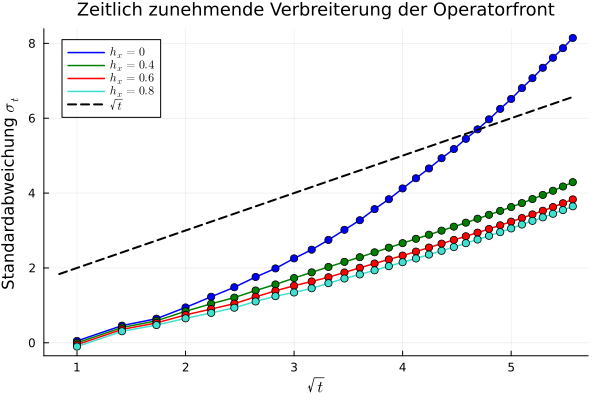

In [41]:
#Vergleich der Standardabweichung der Operatordichte rho_R für verschiedene transversale Felder hx

let trange = 0.7:0.1:31
    sigma_range = 1:31
    
    #Berechne die Standardabweichung für alle 6 verschiedene Werte der logitudinalen Feldkomponente h_x:
    #Für die Zeiten t=1 bis t=30 wird die Standardabweichung für ein festes
    sigma1 = [sqrt(sum([res_l[1][n,s]*s^2 for s in 1:60]) - (sum([res_l[1][n,s]*s for s in 1:60]))^2) for n in 1:31] #hx=0
#     sigma2 = [sqrt(sum([res_l[2][n,s]*s^2 for s in 1:60]) - (sum([res_l[2][n,s]*s for s in 1:60]))^2) for n in 1:31] #hx=0.2
    sigma3 = [sqrt(sum([res_l[3][n,s]*s^2 for s in 1:60]) - (sum([res_l[3][n,s]*s for s in 1:60]))^2) for n in 1:31] #hx=0.4
    sigma4 = [sqrt(sum([res_l[4][n,s]*s^2 for s in 1:60]) - (sum([res_l[4][n,s]*s for s in 1:60]))^2) for n in 1:31] #hx=0.6
    sigma5 = [sqrt(sum([res_l[5][n,s]*s^2 for s in 1:60]) - (sum([res_l[5][n,s]*s for s in 1:60]))^2) for n in 1:31] #hx=0.8
#     sigma6 = [sqrt(sum([res_l[6][n,s]*s^2 for s in 1:60]) - (sum([res_l[6][n,s]*s for s in 1:60]))^2) for n in 1:31] #hx=1.0
    
    
    #Plot der Standardabweichungen(die einzelnen Kurven wurden zur besseren Darstellung leicht nach oben bzw. untern verschoben):
    
    plot(sqrt.(sigma_range),sigma1.+0.05,label=L"$h_{x}=0$",lw=1.5,color="blue")
#     plot!(sqrt.(sigma_range),sigma2.+.1,label=L"$h_{x}=0.2$")
    plot!(sqrt.(sigma_range),sigma3,label=L"$h_{x}=0.4$",lw=1.5,color="green")
    plot!(sqrt.(sigma_range),sigma4.-.05,label=L"$h_{x}=0.6$",lw=1.5,color="red")
    plot!(sqrt.(sigma_range),sigma5.-.1,label=L"$h_{x}=0.8$",lw=1.5,color="turquoise")
#     plot!(sqrt.(sigma_range),sigma6,label=L"$h_{x}=1.0$",color="purple")
    
    scatter!(sqrt.(sigma_range),sigma1.+0.05,lw=1.5,color="blue",label=false)
    scatter!(sqrt.(sigma_range),sigma3,label=false,lw=1.5,color="green")
    scatter!(sqrt.(sigma_range),sigma4.-.05,label=false,lw=1.5,color="red")
    scatter!(sqrt.(sigma_range),sigma5.-.1,label=false,lw=1.5,color="turquoise")
    
    
    
    #Plot der Wurzelfunktion zum Vergleich
    plot!(sqrt.(trange),sqrt.(trange).+1,label=L"$\sqrt{t}$",ls=:dash,lw=2,color="black")

    xlabel!(L"\sqrt{t}")
    ylabel!("Standardabweichung "*L"$\sigma_{t}$")
    title!("Zeitlich zunehmende Verbreiterung der Operatorfront",titlefontsize=12)
    
#     savefig("wurzelform.pdf")
end

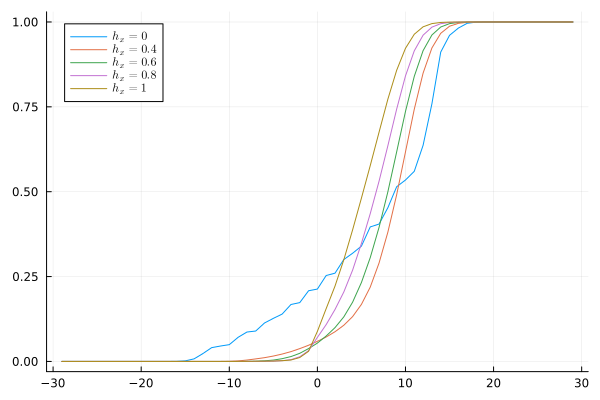

In [42]:
#Plot der kumulativen Operatordichte R(x,t) für verschiedene hx
#(nicht in der Bachelorarbeit)
let layer = size(res_r[1])[2]
    x = -29:29
    xexakt = range(-29, 29, length = 200)
    v_num = fit.param[1]

    
    
    t=31
#     R_exakt(x,t) = (1/2) * (erf(((x-0.5) - (t-1)*v_num) * (1/sqrt((t-1)*(1-v_num^2)))) + 1)

   
    #Berechnung der kumulativen Operatordichte R(x,t) für verschiedene transversale Komponenten
    R1 = [sum(res_r[1][t,1:i]) for i in 1:layer-1]
    R2 = [sum(res_r[2][t,1:i]) for i in 1:layer-1]
    R3 = [sum(res_r[3][t,1:i]) for i in 1:layer-1]
    R4 = [sum(res_r[4][t,1:i]) for i in 1:layer-1]
    R5 = [sum(res_r[5][t,1:i]) for i in 1:layer-1]
    R6 = [sum(res_r[6][t,1:i]) for i in 1:layer-1]
    
    plot(x,[R1 R3 R4 R5 R6], label=[L"$h_{x}=0$" L"$h_{x}=0.4$" L"$h_{x}=0.6$" L"$h_{x}=0.8$" L"$h_{x}=1$" L"$h_{x}=1.2$"])
#     plot(x,[ R3 R4 R5 R6 R7], label=[L"$h_{x}=0.4$" L"$h_{x}=0.6$" L"$h_{x}=0.8$" L"$h_{x}=1$" L"$h_{x}=1.2$"])
#     plot(x,[ R4  R5  R7], label=[L"$h_{x}=0.6$"  L"$h_{x}=0.8$" L"$h_{x}=1.2$"])

    
#     plot!(xexakt,R_exakt.(xexakt,t), label=L"$\overline{R_{exakt}(x,t)}$",color="green",ls=:dot,lw=2)

    
    
end

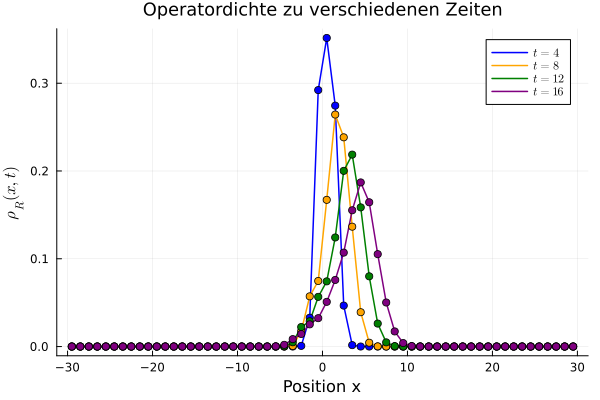

In [45]:
#Operatordichte rho_R zu verschiedenen Zeiten  (nicht in der Bachelorarbeit)
let
    
    xaxisvalues = -29.5:29.5
   
    
    #Plot der Operatordichte für hx=0.6 bei verschiedenen Zeiten
    plot(xaxisvalues,res_r[4][5,:],label=L"t=4",lw=1.5,color="blue")
    plot!(xaxisvalues,res_r[4][9,:],label=L"t=8",lw=1.5,color="orange")
    plot!(xaxisvalues,res_r[4][13,:],label=L"t=12",lw=1.5,color="green")
    plot!(xaxisvalues,res_r[4][17,:],label=L"t=16",lw=1.5,color="purple")
    
    scatter!(xaxisvalues,res_r[4][5,:],lw=1.5,color="blue",label=false)
    scatter!(xaxisvalues,res_r[4][9,:],lw=1.5,color="orange",label=false)
    scatter!(xaxisvalues,res_r[4][13,:],lw=1.5,color="green",label=false)
    scatter!(xaxisvalues,res_r[4][17,:],lw=1.5,color="purple",label=false)
    xlabel!("Position x")
    ylabel!(L"\rho_{R}(x,t)")
    
    title!("Operatordichte zu verschiedenen Zeiten",titlefontsize=12)
    
# savefig("Operatordichte_zu_verschiedenen_Zeiten.pdf")    
end

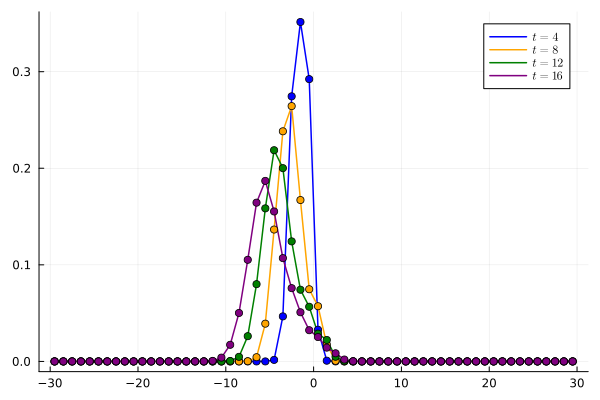

In [44]:
#Operatordichte rho_L zu verschiedenen Zeiten (nicht in der Bachelorarbeit)
let
    
    xaxisvalues = -29.5:29.5
   
    
    #Plot der Operatordichte für hx=0.6 bei verschiedenen Zeiten
    plot(xaxisvalues,[res_l[4][i,:] for i in 5:4:17])
    plot(xaxisvalues,res_l[4][5,:],label=L"t=4",lw=1.5,color="blue")
    plot!(xaxisvalues,res_l[4][9,:],label=L"t=8",lw=1.5,color="orange")
    plot!(xaxisvalues,res_l[4][13,:],label=L"t=12",lw=1.5,color="green")
    plot!(xaxisvalues,res_l[4][17,:],label=L"t=16",lw=1.5,color="purple")
    
    scatter!(xaxisvalues,res_l[4][5,:],lw=1.5,color="blue",label=false)
    scatter!(xaxisvalues,res_l[4][9,:],lw=1.5,color="orange",label=false)
    scatter!(xaxisvalues,res_l[4][13,:],lw=1.5,color="green",label=false)
    scatter!(xaxisvalues,res_l[4][17,:],lw=1.5,color="purple",label=false)
    
end

In [46]:
#Laden der Daten für den Vergleich zwischen verschiedenen Bond Dimensionen 

#Bond Dimensionen = 50
output_folder1 = "chaotisches_Ising_Modell_50_delta_0.1"


files1 = joinpath.(output_folder1, readdir(output_folder1))

L_f1 = length(files1)
res_r1 = Vector{Matrix{Float64}}(undef, L_f1)
res_l1 = similar(res_r1)
for (j,f) in enumerate(files1[1:L_f1])
    res1 = readdlm(f)
    L2 = size(res1,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l1[j] = reverse(res1[:, 1:L],dims=1)
    res_r1[j] = reverse(res1[:, L+1:end], dims = 1) 
end

#Bond Dimensionen = 100
output_folder2 = "chaotisches_Ising_Modell_100_delta_0.1"


files2 = joinpath.(output_folder2, readdir(output_folder2))

L_f2 = length(files2)
res_r2 = Vector{Matrix{Float64}}(undef, L_f2)
res_l2 = similar(res_r2)
for (j,f) in enumerate(files2[1:L_f2])
    res2 = readdlm(f)
    L2 = size(res2,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l2[j] = reverse(res2[:, 1:L],dims=1)
    res_r2[j] = reverse(res2[:, L+1:end], dims = 1) 
end

#Bond Dimensionen = 150
output_folder3 = "chaotisches_Ising_Modell_150_delta_0.1"


files3 = joinpath.(output_folder3, readdir(output_folder3))

L_f3 = length(files3)
res_r3 = Vector{Matrix{Float64}}(undef, L_f3)
res_l3 = similar(res_r3)
for (j,f) in enumerate(files3[1:L_f3])
    res3 = readdlm(f)
    L2 = size(res3,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l3[j] = reverse(res3[:, 1:L],dims=1)
    res_r3[j] = reverse(res3[:, L+1:end], dims = 1) 
end

#Bond Dimensionen = 200
output_folder4 = "chaotisches_Ising_Modell_200_delta_0.1"


files4 = joinpath.(output_folder4, readdir(output_folder4))

L_f4 = length(files4)
res_r4 = Vector{Matrix{Float64}}(undef, L_f4)
res_l4 = similar(res_r4)
for (j,f) in enumerate(files4[1:L_f4])
    res4 = readdlm(f)
    L2 = size(res4,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l4[j] = reverse(res4[:, 1:L],dims=1)
    res_r4[j] = reverse(res4[:, L+1:end], dims = 1)
end

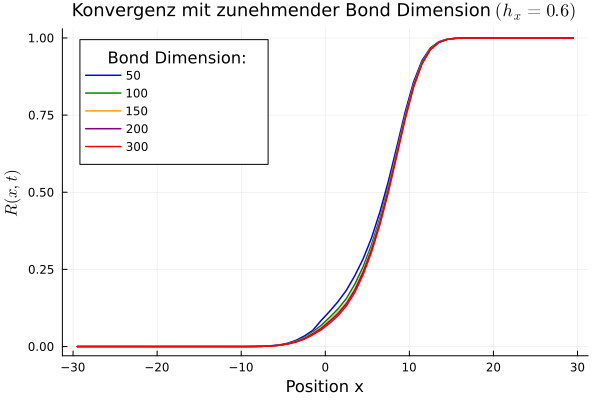

In [53]:
#Vergleich der kumulativen Operatordichte R(x,t) für verschiedenen Bond Dimensionen (hx=0.6)

let 
    L = size(res_r1[4])[2] #Systemgröße ist für alle gleich
    t=31
    x = -29.5:29.5

    

   
    #Berechnung der kumulativen Operatordichte R(x,t) für verschiedene Bond Dimensionen
    R1 = [sum(res_r1[4][t,1:i]) for i in 1:L] #50
    R2 = [sum(res_r2[4][t,1:i]) for i in 1:L] #100
    R3 = [sum(res_r3[4][t,1:i]) for i in 1:L] #150
    R4 = [sum(res_r4[4][t,1:i]) for i in 1:L] #200
    R = [sum(res_r[4][t,1:i]) for i in 1:L] #300
    
    
    

    
    #Plot der kumulativen Operatordichte R(x,t) für verschiedene Bond Dimensionen
    plot(x,R1,label="50",lw=1.5,color="blue",legendtitle="Bond Dimension:")
    plot!(x,R2,label="100",color="green",lw=1.5)
    plot!(x,R3,label="150",color= "orange",lw=1.5)
    plot!(x,R4,label="200",color= "purple ",lw=1.5)
    plot!(x,R,label="300",color="red",lw=1.5)
    xlabel!("Position x")
    ylabel!(L"R(x,t)")
    title!("Konvergenz mit zunehmender Bond Dimension "*L"$(h_{x}=0.6)$",titlefontsize=12)
    
    
#     savefig("Konvergenz_Ising.pdf")
    

    
    
end